# Wind Study Toulouse

## 1 - Preliminary work

### 1.1 - Import packages and load data

In [1]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

In [2]:
#Choix des options

#Lien pour les données
#data_path=""
#data_path="Données/"
data_path="../Données/"

In [3]:
from utility_tools import regroupement_data

data_hToulouse_wind,data_dToulouse_wind=regroupement_data(data_path+'Data_Toulouse/Wind_power_default/',1980,2022)
data_hToulouse_weather,data_dToulouse_weather=regroupement_data(data_path+'Data_Toulouse/Weather/',2000,2022,data_type="weather")

Toutes les données sont différentes
Toutes les données sont différentes


### 1.2 - Tendency and Seasonnality study

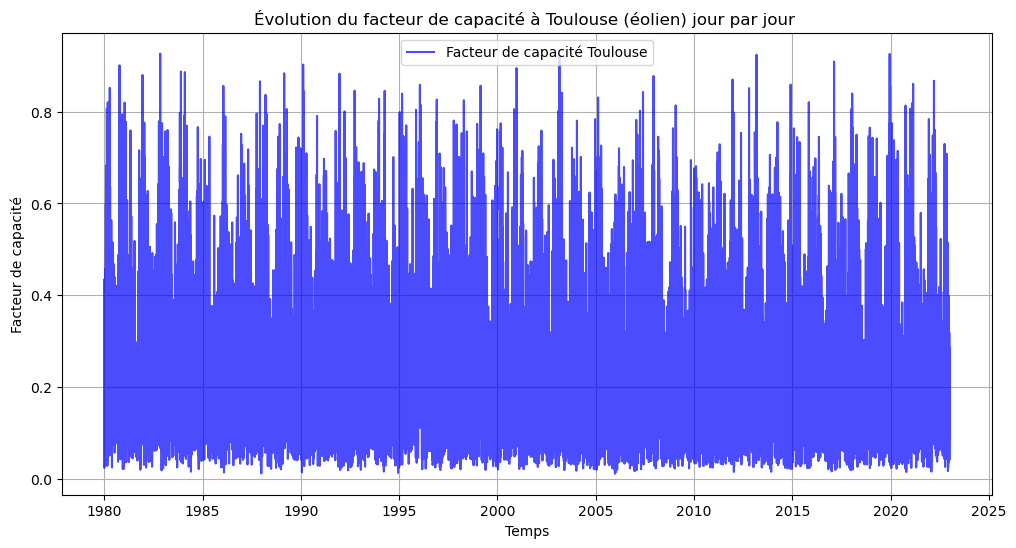

In [4]:
# Création du graphique de série temporelle pour la capacité
plt.figure(figsize=(12, 6))
plt.plot(data_dToulouse_wind.index, data_dToulouse_wind['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Calcul de la tendance et de la saisonnalité

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

tendency_Toulouse_wind,seasonnality_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='mobile28_d')


Tendance à Toulouse :  0.22975704879239356


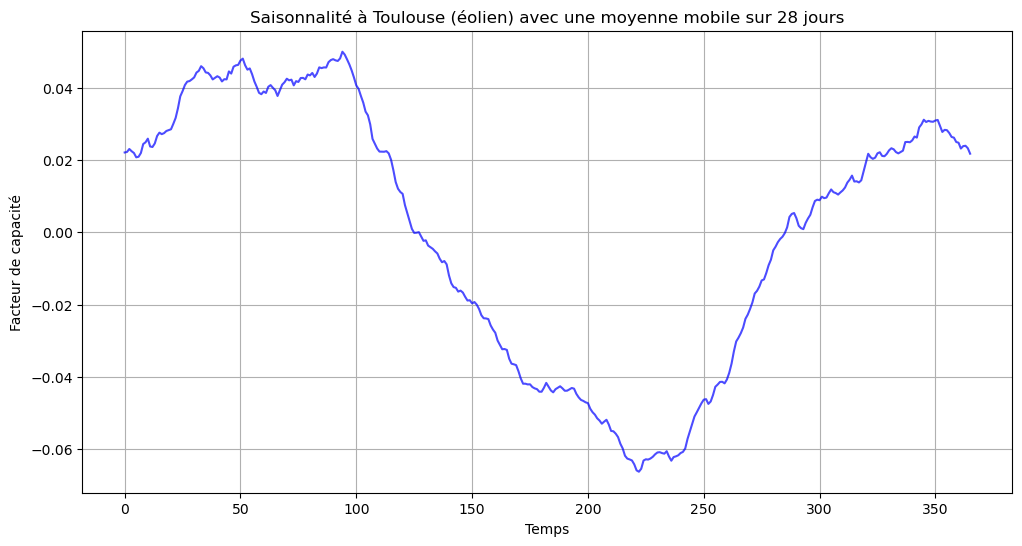

In [23]:
# Affichage de la tendance et de la saisonnalité

print("Tendance à Toulouse : ",tendency_Toulouse_wind)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),seasonnality_Toulouse_wind, label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Saisonnalité à Toulouse (éolien) avec une moyenne mobile sur 28 jours')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

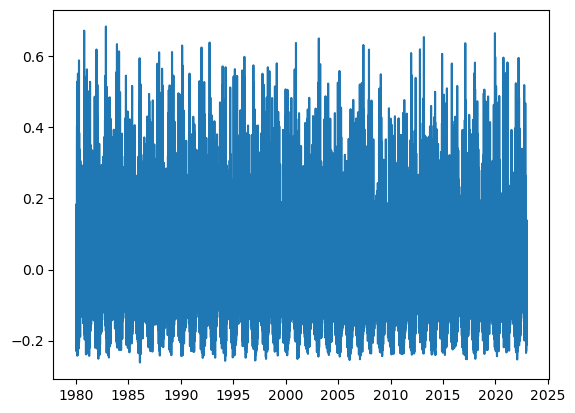

In [24]:
# Affichage des résidus

from methodes_etude_serie import Retrait_Tendance_Saisonnalite

data_stationnary = Retrait_Tendance_Saisonnalite(data_dToulouse_wind, tendency_Toulouse_wind, seasonnality_Toulouse_wind)

plt.plot(data_stationnary['electricity'])

### Modélisation Arma